In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import pandas as pd

test_dataset_filepath = 'test.csv'
train_dataset_filepath = 'train.csv'

test_dataset = pd.read_csv(test_dataset_filepath)
train_dataset = pd.read_csv(train_dataset_filepath)

In [17]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print('\nTest Dataset')
print(test_dataset.head(5))
print('\nTrain Dataset')
print(train_dataset.head(5))


Test Dataset
   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13  \
0   4    A    B    A    A    A    A    A    A    B     A     B     A     A   
1   6    A    B    A    B    A    A    A    A    B     A     A     A     A   
2   9    A    B    A    B    B    A    B    A    B     B     A     B     B   
3  12    A    A    A    A    B    A    A    A    A     A     A     A     A   
4  15    B    A    A    A    A    B    A    A    A     A     A     A     A   

  cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     B     B     A   
2     B     A     A     A     A     A     A     A     A     B     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat26 cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat3

In [18]:
ID = test_dataset['id']
test_dataset.drop('id', axis=1, inplace=True)

In [23]:
print('\nTest Dataset\n {}'.format(test_dataset.iloc[:4,:4]))


Test Dataset
   cat1 cat2 cat3 cat4
0    A    B    A    A
1    A    B    A    B
2    A    B    A    B
3    A    A    A    A


In [24]:
print('\nTrain Dataset\n {}'.format(train_dataset.iloc[:4,:4]))


Train Dataset
    id cat1 cat2 cat3
0   1    A    B    A
1   2    A    B    A
2   5    A    B    A
3  10    B    B    A


In [25]:
print('\nTrain Dataset shape \n{}'.format(train_dataset.shape))


Train Dataset shape 
(188318, 132)


In [26]:
train_dataset.drop('id', axis=1, inplace=True)

In [27]:
print('\nTrain Dataset shape \n{}'.format(train_dataset.shape))


Train Dataset shape 
(188318, 131)


In [28]:
print('\nTrain Dataset\n {}'.format(train_dataset.iloc[:4,:4]))


Train Dataset
   cat1 cat2 cat3 cat4
0    A    B    A    B
1    A    B    A    A
2    A    B    A    A
3    B    B    A    B


In [31]:
print('\n\tTrain Dataset summary\n\n{}'.format(train_dataset.describe()))


	Train Dataset summary

               cont1          cont2          cont3          cont4  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.493861       0.507188       0.498918       0.491812   
std         0.187640       0.207202       0.202105       0.211292   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.346090       0.358319       0.336963       0.327354   
50%         0.475784       0.555782       0.527991       0.452887   
75%         0.623912       0.681761       0.634224       0.652072   
max         0.984975       0.862654       0.944251       0.954297   

               cont5          cont6          cont7          cont8  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.487428       0.490945       0.484970       0.486437   
std         0.209027       0.205273       0.178450       0.199370   
min         0.281143       0.012683       0.069503       0.236880   
25%     

In [33]:
print('\n\tTrain Dataset Skewness\n\n{}'.format(train_dataset.skew()))


	Train Dataset Skewness

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

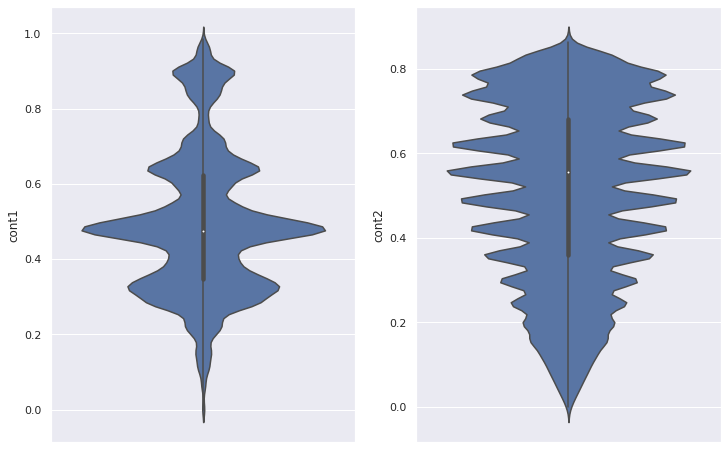

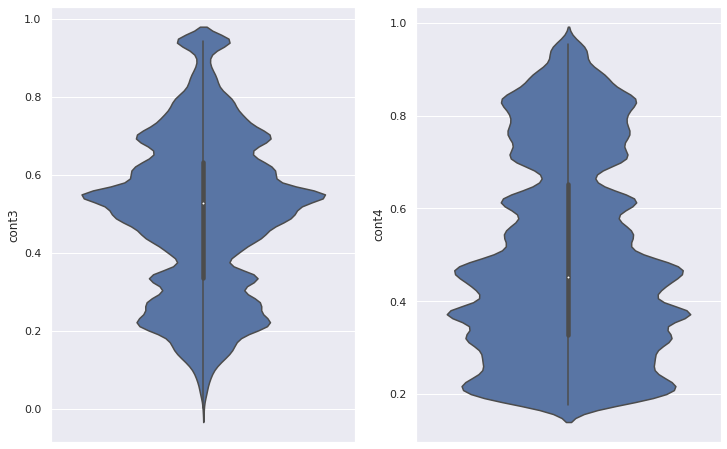

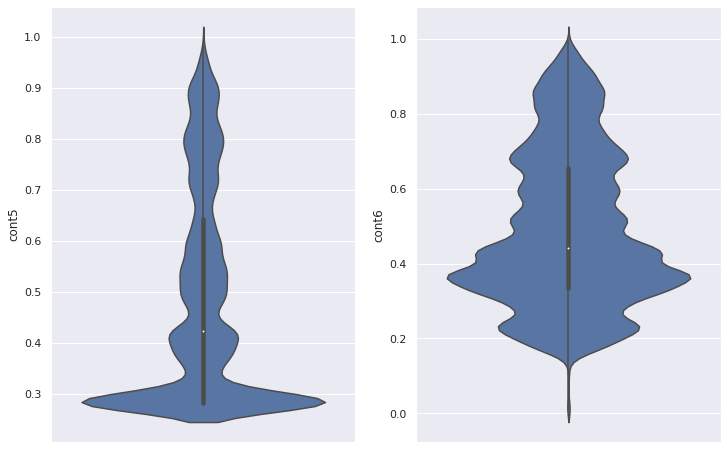

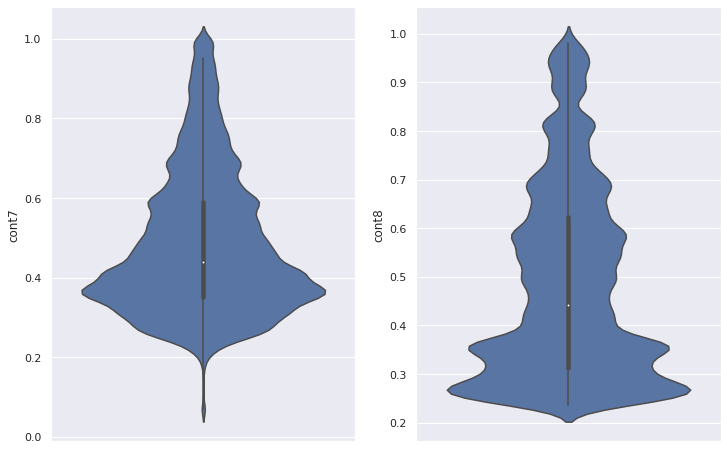

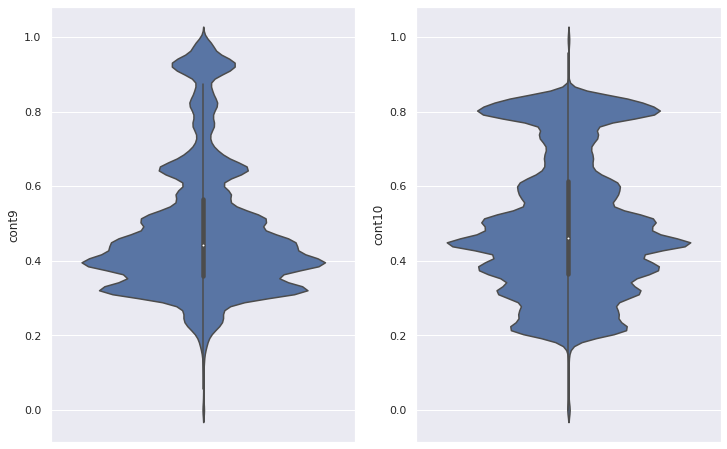

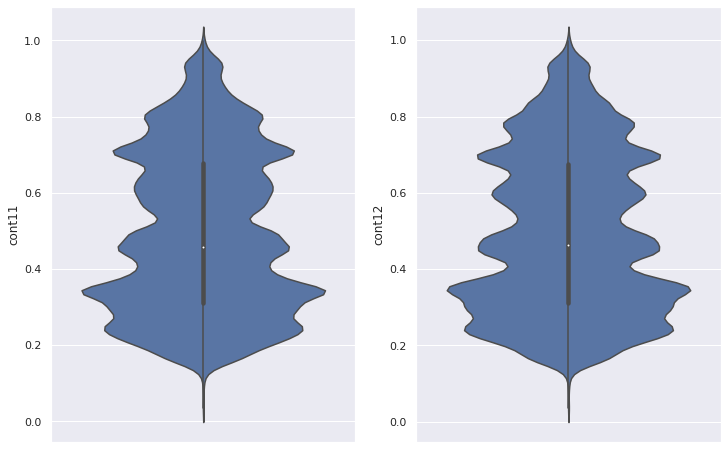

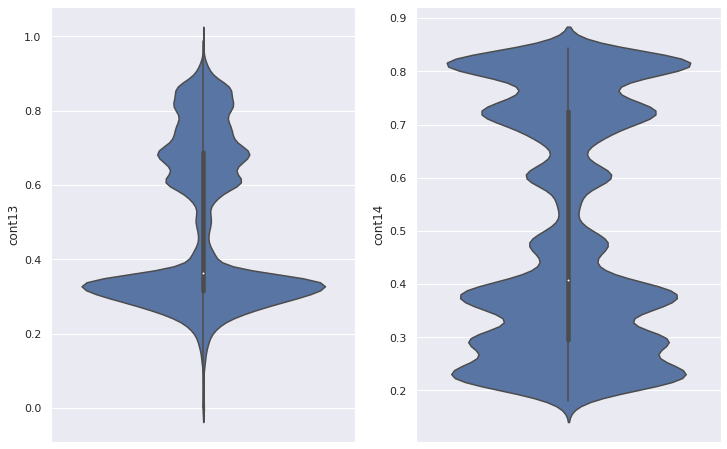

In [37]:
split = 116
size = 15
train_dataset_cont_features = train_dataset.iloc[:,split:]
cols = train_dataset_cont_features.columns
n_cols = 2
n_rows = 7

sns.set(style='darkgrid')

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1, ncols=n_cols, figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i * n_cols + j], data=train_dataset_cont_features, ax=ax[j])